[[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]


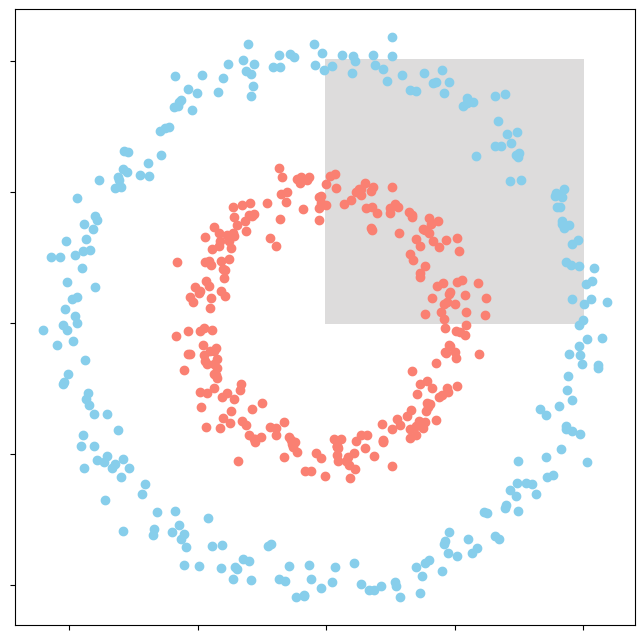

In [5]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

/tmp/ipykernel_11128/3901241878.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Step 0 / 1000 - Loss =  0.51917666 - Acc = 0.412
Step 25 / 1000 - Loss =  0.4710187 - Acc = 0.434
Step 50 / 1000 - Loss =  0.17649877 - Acc = 0.83
Step 75 / 1000 - Loss =  0.12092455 - Acc = 0.9
Step 100 / 1000 - Loss =  0.09788871 - Acc = 0.928
Step 125 / 1000 - Loss =  0.08243815 - Acc = 0.944
Step 150 / 1000 - Loss =  0.070625864 - Acc = 0.96
Step 175 / 1000 - Loss =  0.060806468 - Acc = 0.968
Step 200 / 1000 - Loss =  0.05249239 - Acc = 0.978
Step 225 / 1000 - Loss =  0.045579955 - Acc = 0.988
Step 250 / 1000 - Loss =  0.039771385 - Acc = 0.992
Step 275 / 1000 - Loss =  0.03491747 - Acc = 0.996
Step 300 / 1000 - Loss =  0.030857343 - Acc = 0.998
Step 325 / 1000 - Loss =  0.027456714 - Acc = 1.0
Step 350 / 1000 - Loss =  0.024576463 - Acc = 1.0
Step 375 / 1000 - Loss =  0.022098398 - Acc = 1.0
Step 400 / 1000 - Loss =  0.019922549 - Acc = 1.0
Step 425 / 1000 - Loss =  0.018080551 - Acc = 1.0
Step 450 / 1000 - Loss =  0.016496941 - Acc = 1.0
Step 475 / 1000 - Loss =  0.015122318 - Ac

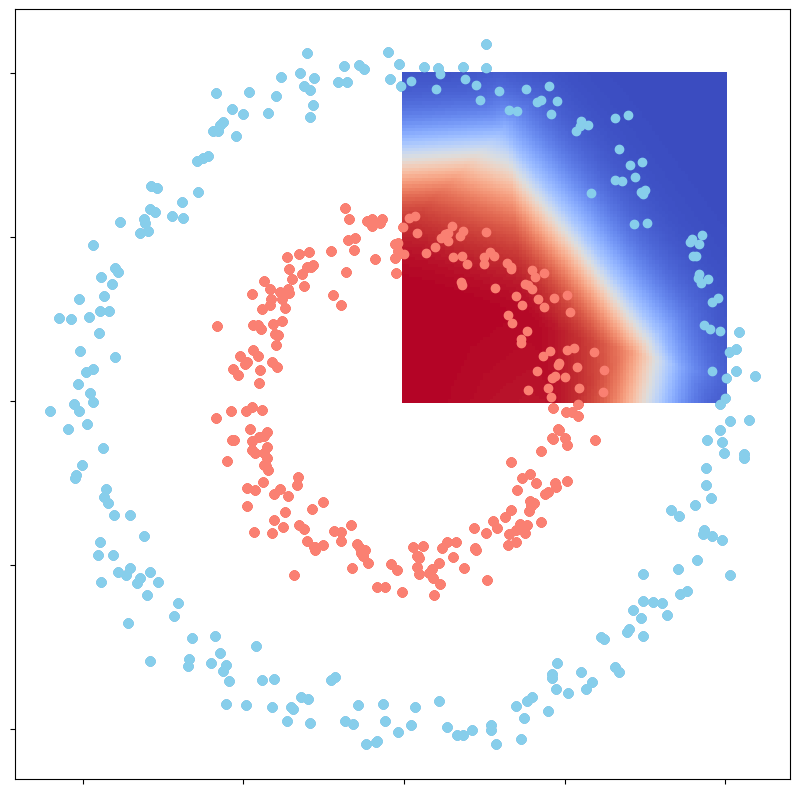

In [6]:
# Hay que cambiar la manera en al que se importa para que funcione
import tensorflow.compat.v1 as tf

from matplotlib import animation
from IPython.core.display import display, HTML

# Para que funcionen las cosas de la version 1
tf.disable_v2_behavior()

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

# learning rate
lr = 0.01
# número de neuronas por capa.
nn = [2, 16, 8, 1]

# Capa 1
#   Array de pesos de la primera capa
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
#   Array de los bias de la primera capa
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

#   Al ser la primera capa no tiene datos de entrada, asi que cogemos los iX
#   Funcion de activacion
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
#   Array de pesos de la primera capa
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
#   Array de los bias de la primera capa
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

#   Funcion de activacion
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
#   Array de pesos de la segunda capa
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
#   Array de los bias de la segunda capa
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

#   Vector de predicciones, no es l3 si no pY por que es la salida
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)
      
  
# ----- CÓDIGO ANIMACIÓN ----- #

# Array con las imagenes
ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani.save("animation.mp4")